In [11]:

import matplotlib

import sys, os

#print(os.getcwd())
sys.path.insert(0,os.getcwd()+'/../')

import plot_result

mem_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/membrane_cap'
plot_r = plot_result.plot_prn

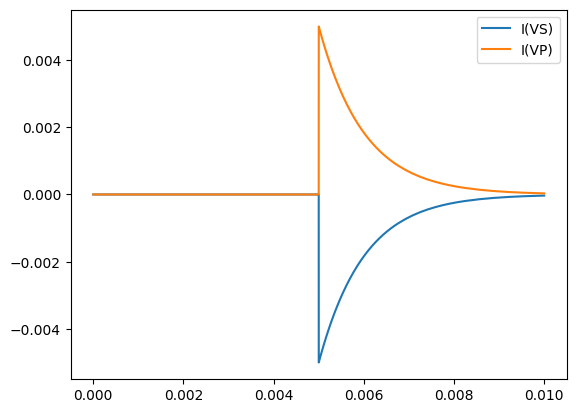

In [5]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1.cir.prn')

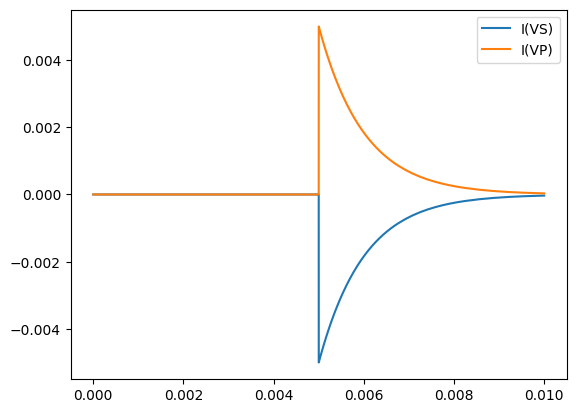

In [31]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_0_1.cir.prn')

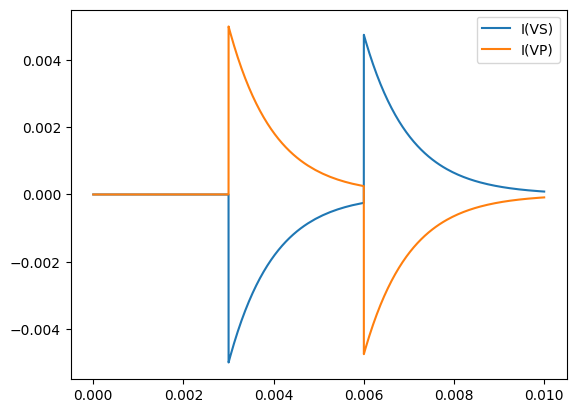

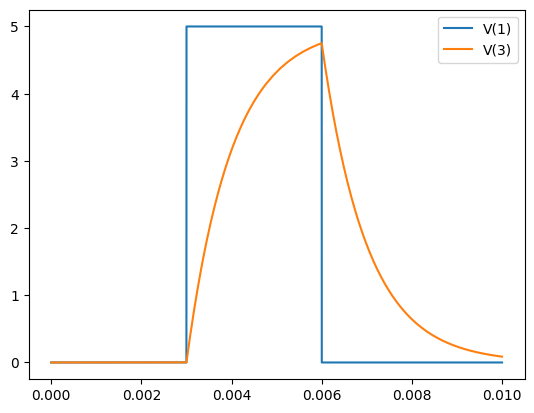

In [32]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4_V.cir.prn')

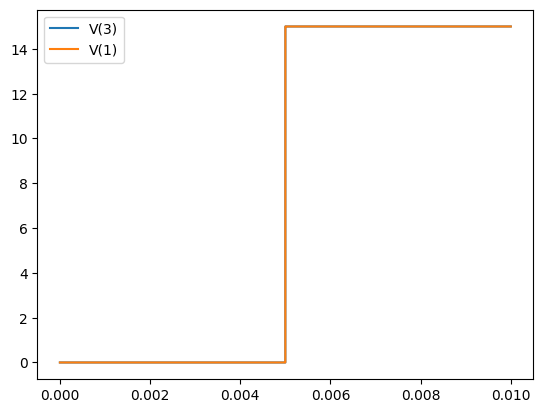

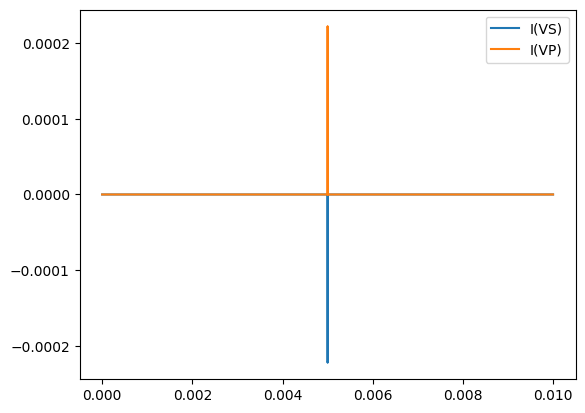

In [33]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2_V.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2_I.cir.prn')

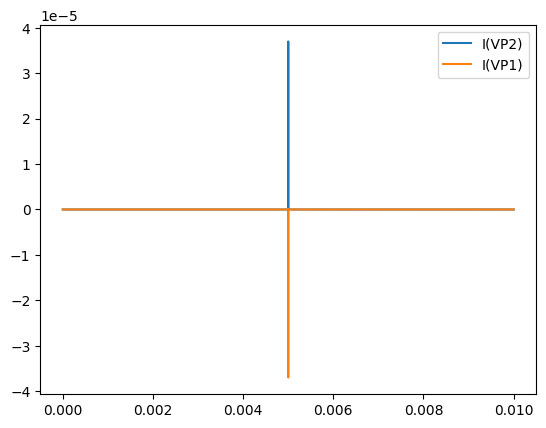

In [34]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_3.cir.prn')

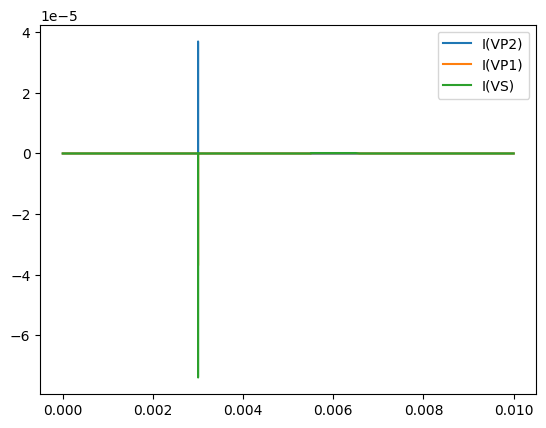

In [35]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_4.cir.prn')

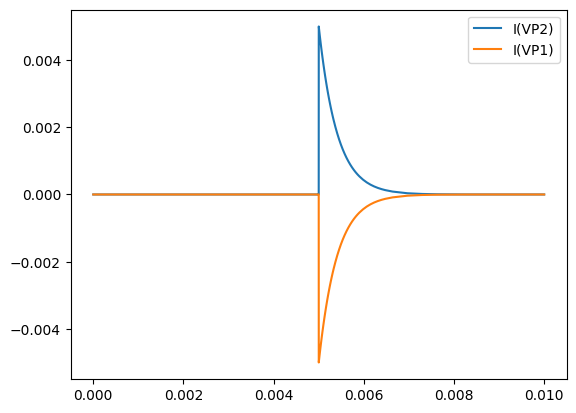

In [36]:
#plot_r(mem_t_dir+'/mem_cap_test_v_0_5.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5.cir.prn')

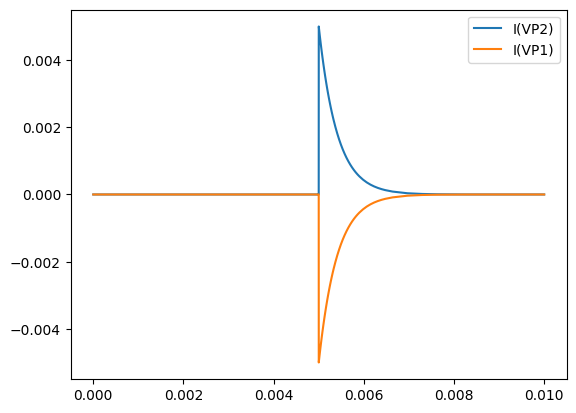

In [37]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_I.cir.prn')
#plot_r(mem_t_dir+'/mem_cap_test_v_0_5_1_I.cir.prn')

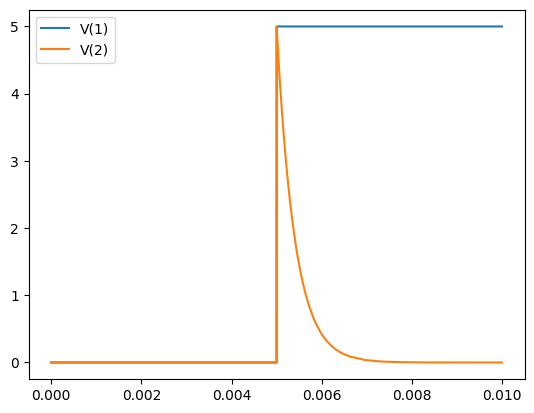

In [38]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_V.cir.prn')

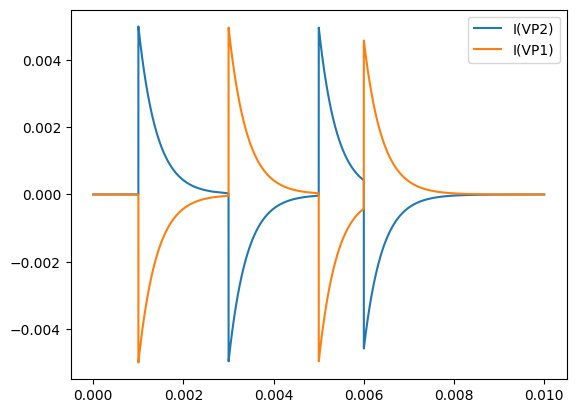

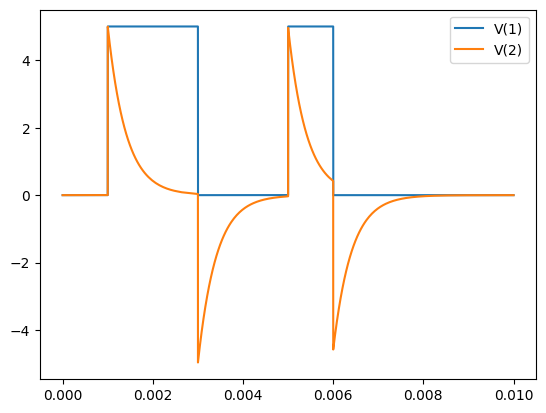

In [39]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_I.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_V.cir.prn')